In [1]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
plt.rcParams['savefig.dpi'] = 50

### Pmax = 0.1

In [36]:
df = pd.read_csv('Data/control_delta_Pmax_both_varying_doubling_3-4_line', delim_whitespace = True)
df = df[df.delta > 0.2]

df1 = df[df.Pmax == 0.1]
delta1 = df1.loc[:, 'delta']
controls1 = df1.iloc[:, 2:10]
controls1 = -controls1 # I forgot the minus in the printing of data
controls1_abs = controls1.abs()
controls1_sum = controls1_abs.sum(axis=1)

df1.head(2)
df1.tail()

,delta,Pmax,control[0],control[1],control[2],control[3],control[4],control[5],control[6],control[7]
444,0.7,0.1,-0.010042,0.056751,0.054744,0.024286,-0.059935,-0.062621,0.056751,-0.059935
445,0.6,0.1,-0.008395,0.050839,0.048938,0.021501,-0.053735,-0.056253,0.050839,-0.053735
446,0.5,0.1,-0.006816,0.044242,0.042509,0.018558,-0.046827,-0.049081,0.044242,-0.046827
447,0.4,0.1,-0.005306,0.036926,0.035430,0.015443,-0.039175,-0.041069,0.036926,-0.039175
448,0.3,0.1,-0.003867,0.028871,0.027685,0.012138,-0.030751,-0.032197,0.028871,-0.030751


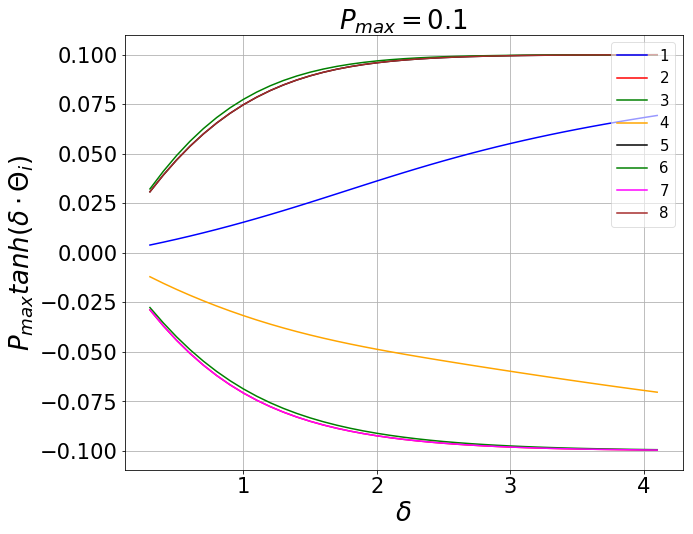

In [38]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
#ax.plot(delta, controls, markevery=10000)
ax.plot(delta1, controls1.iloc[:,0], label = "1", color="blue")
ax.plot(delta1, controls1.iloc[:,1], label = "2", color='red')
ax.plot(delta1, controls1.iloc[:,2], label = "3", color='green')
ax.plot(delta1, controls1.iloc[:,3], label = "4", color='orange')
ax.plot(delta1, controls1.iloc[:,4], label = "5", color='black')
ax.plot(delta1, controls1.iloc[:,5], label = "6", color='green')
ax.plot(delta1, controls1.iloc[:,6], label = "7", color='fuchsia')
ax.plot(delta1, controls1.iloc[:,7], label = "8", color='brown')
plt.legend(loc='upper right', prop={'size': 15}, framealpha=0.6)
ax.set_xlabel('$\delta$', fontsize=20, rotation=0, size = 26)
ax.set_ylabel('$P_{max} tanh( \delta \cdot \Theta_{i} )$', fontsize=18, rotation=90, size = 26)
ax.set_title("$P_{max} = 0.1$", size=26)
ax.tick_params(labelsize=21)
plt.grid()
plt.savefig('control_vs_delta_Pmax_01_doubling_3-4_line_2.png', bbox_inches='tight', dpi = 80)
#plt.savefig('control_varying_delta_Pmax_01.png', bbox_inches='tight', dpi = 40)
plt.show()

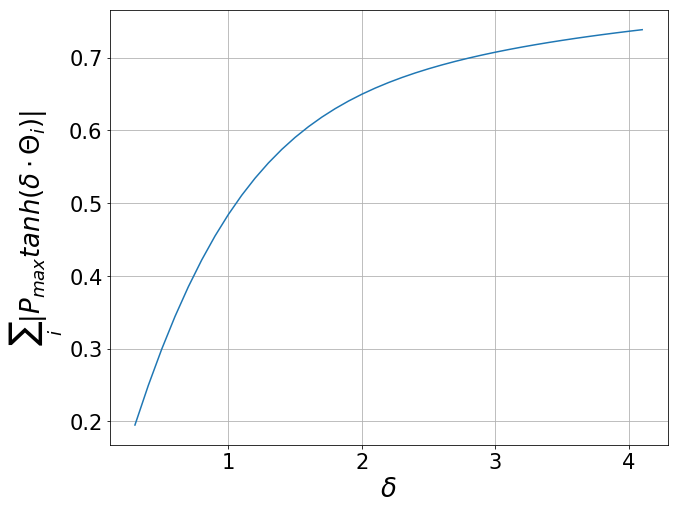

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(delta1, controls1_sum)
ax.set_xlabel('$\delta$', fontsize=20, rotation=0, size = 26)
ax.set_ylabel('$\sum_i | P_{max} tanh( \delta \cdot \Theta_{i} )| $', fontsize=18, rotation=90, size = 26)
ax.tick_params(labelsize=21)
plt.grid()
plt.savefig('sum_controls_vs_delta_Pmax_01_doubling_3-4_line.png', bbox_inches='tight', dpi = 50)
plt.show()

### Pmax = 0.2

In [9]:
df2 = df[df.Pmax == 0.2]

delta2 = df2.iloc[:,0]
controls2 = df2.iloc[:, 2:10]
controls2 = -controls2 # I forget the minus in the printing of data
controls2_abs = controls2.abs()
controls2_sum = controls2_abs.sum(axis=1)

df2.head(2)

,delta,Pmax,control[0],control[1],control[2],control[3],control[4],control[5],control[6],control[7]
369,4.1,0.2,-0.126433,0.198221,0.197676,0.131010,-0.199494,-0.199707,0.198221,-0.199494
370,4.0,0.2,-0.124401,0.197982,0.197391,0.129498,-0.199401,-0.199650,0.197982,-0.199401


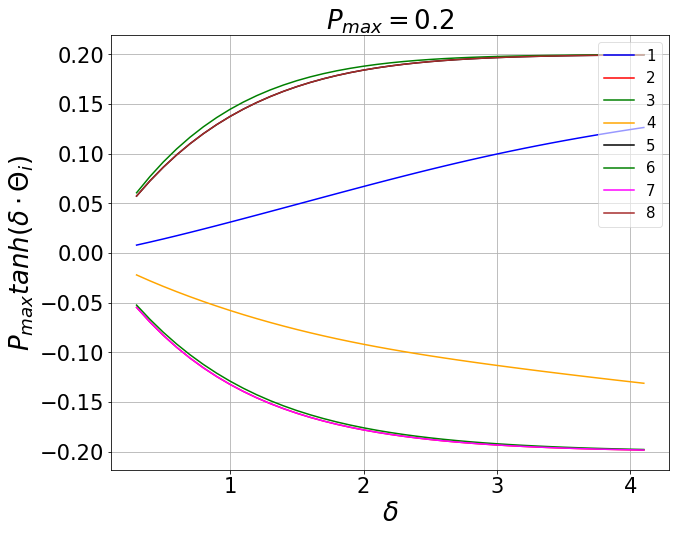

In [35]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
#ax.plot(delta, controls, markevery=10000)

ax.plot(delta2, controls2.iloc[:,0], label = "1", color="blue")
ax.plot(delta2, controls2.iloc[:,1], label = "2", color='red')
ax.plot(delta2, controls2.iloc[:,2], label = "3", color='green')
ax.plot(delta2, controls2.iloc[:,3], label = "4", color='orange')
ax.plot(delta2, controls2.iloc[:,4], label = "5", color='black')
ax.plot(delta2, controls2.iloc[:,5], label = "6", color='green')
ax.plot(delta2, controls2.iloc[:,6], label = "7", color='fuchsia')
ax.plot(delta2, controls2.iloc[:,7], label = "8", color='brown')
plt.legend(loc='upper right', prop={'size': 15}, framealpha=0.6)
ax.set_title("$P_{max} = 0.2$", size=26)
ax.set_xlabel('$\delta$', fontsize=20, rotation=0, size = 26)
ax.set_ylabel('$P_{max} tanh( \delta \cdot \Theta_{i} )$', fontsize=18, rotation=90, size = 26)
ax.tick_params(labelsize=21)
plt.grid()
plt.savefig('control_vs_delta_Pmax_02_doubling_3-4_line_2.png', bbox_inches='tight', dpi = 80)
#plt.savefig('control_varying_delta_Pmax_01.png', bbox_inches='tight', dpi = 40)
plt.show()

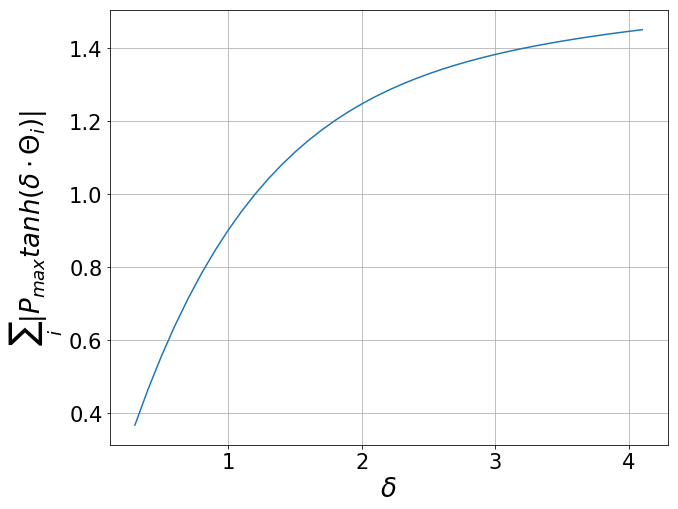

In [17]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(delta2, controls2_sum)
ax.set_xlabel('$\delta$', fontsize=20, rotation=0, size = 26)
ax.set_ylabel('$\sum_i | P_{max} tanh( \delta \cdot \Theta_{i} )| $', fontsize=18, rotation=90, size = 26)
ax.tick_params(labelsize=21)
plt.grid()
plt.savefig('sum_controls_vs_delta_Pmax_02_doubling_3-4_line.png', bbox_inches='tight', dpi = 50)
plt.show()

### Surface plot

In [24]:
delta3 = df.iloc[:,0]
Pmax3 = df.iloc[:,1]
controls3 = df.iloc[:, 2:9]
controls_abs3 = controls3.abs()
controls_sum3 = controls_abs3.sum(axis=1)

In [25]:
delta3 = np.matrix(delta3)
Pmax3 = np.matrix(Pmax3)
control_sum3 = np.matrix(controls_sum3)
print(delta3.shape)
x = np.reshape(delta3, (492))
print(x.shape)
x = np.reshape(delta3, (123, 4))
print(x.shape)

(1, 492)
(1, 492)
(123, 4)


In [26]:
print(len(delta3))
x = np.reshape(delta3, (4, 123))
y = np.reshape(Pmax3, (4, 123))
z = np.reshape(control_sum3, (4, 123))

1


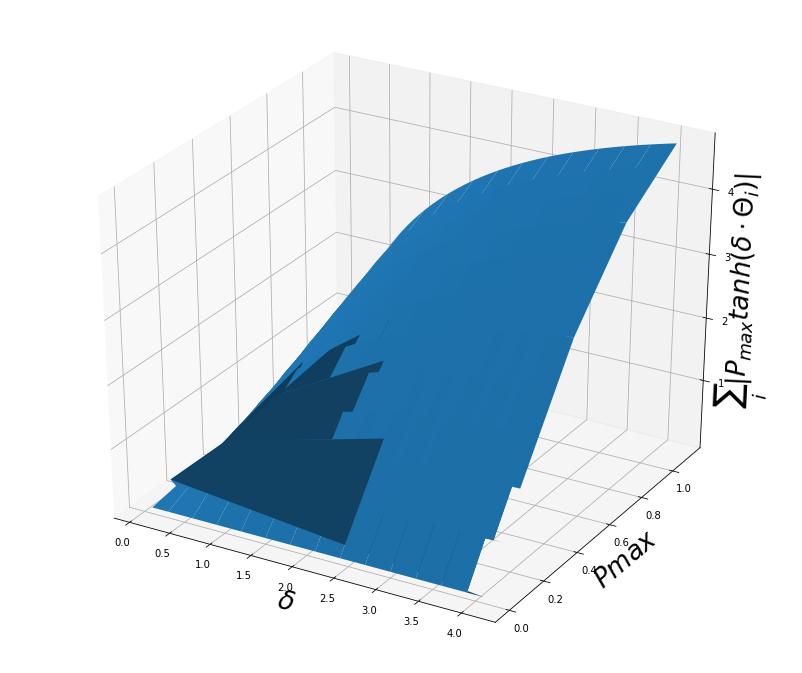

In [61]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z)

ax.set_xlabel('$\delta$', fontsize=22, rotation=150, size = 26)
ax.set_ylabel('$Pmax$', fontsize=20, size = 26)
ax.set_zlabel('$\sum_i | P_{max} tanh( \delta \cdot \Theta_{i} )| $', fontsize=20, rotation=60, size = 26)
plt.savefig('surface_doubled.png', bbox_inches='tight', dpi = 50)
plt.show()

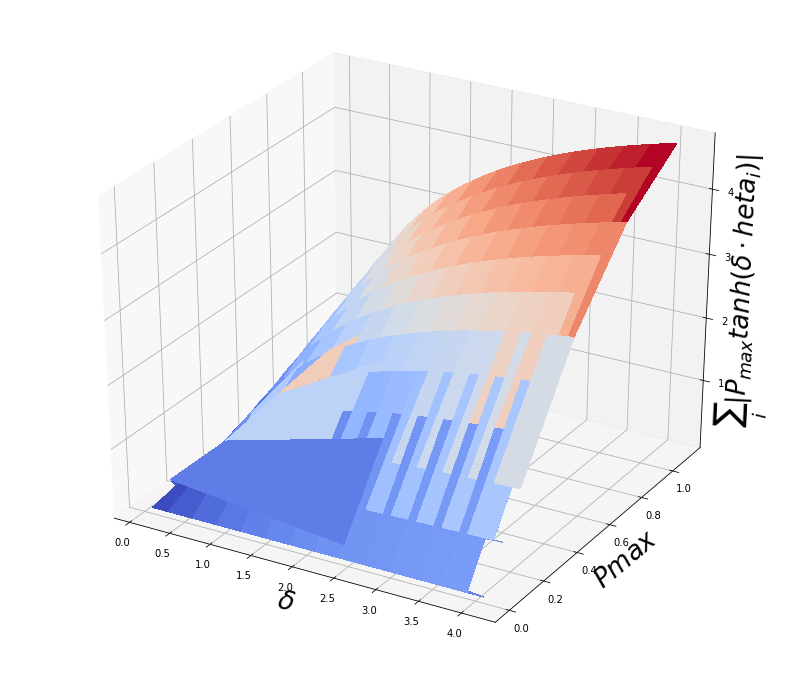

In [28]:
fig = plt.figure(figsize=(14,12))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('$\delta$', fontsize=22, rotation=150, size = 26)
ax.set_ylabel('$Pmax$', fontsize=10, size = 26)
ax.set_zlabel('$\sum_i | P_{max} tanh( \delta \cdot \theta_{i} )| $', fontsize=10, rotation=60, size = 26)
plt.show()